# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
#variables that need to be stored:
temp = []
humid = []
cloud = []
wind_sp = []
lat = []
lng = []
date = []
country = []
new_city = []
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + key
count =1
record = 1
#testing out the loop

for city in cities:
    print(f'Please wait while we retrieve data on {city}')
    #if count == 25:
        #count +=1
        #record = 0
        #break
    query_url = f"{base_url}&q={city}"   
    record += 1 
#thank you askBCS
    try:   
        response = requests.get(query_url).json()  
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all'])
        humid.append(response['main']['humidity'])
        wind_sp.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        new_city.append(response['name'])
    except KeyError:
        print("Data not found")
        pass
    count = count + 1

print(f'End of data retrieval')

Please wait while we retrieve data on albany
Please wait while we retrieve data on ushuaia
Please wait while we retrieve data on play cu
Data not found
Please wait while we retrieve data on saskylakh
Please wait while we retrieve data on usoke
Please wait while we retrieve data on mys shmidta
Data not found
Please wait while we retrieve data on hilo
Please wait while we retrieve data on bambous virieux
Please wait while we retrieve data on attawapiskat
Data not found
Please wait while we retrieve data on sharjah
Please wait while we retrieve data on kapaa
Please wait while we retrieve data on taolanaro
Data not found
Please wait while we retrieve data on shache
Please wait while we retrieve data on shitanjing
Please wait while we retrieve data on vaini
Please wait while we retrieve data on eregli
Please wait while we retrieve data on hermanus
Please wait while we retrieve data on bredasdorp
Please wait while we retrieve data on mahebourg
Please wait while we retrieve data on san cristo

Please wait while we retrieve data on esperance
Please wait while we retrieve data on longyearbyen
Please wait while we retrieve data on susangerd
Please wait while we retrieve data on port blair
Please wait while we retrieve data on port hawkesbury
Please wait while we retrieve data on kortkeros
Please wait while we retrieve data on benin
Please wait while we retrieve data on ankazoabo
Please wait while we retrieve data on faanui
Please wait while we retrieve data on airai
Please wait while we retrieve data on barawe
Data not found
Please wait while we retrieve data on taitung
Please wait while we retrieve data on komsomolskiy
Please wait while we retrieve data on jabiru
Data not found
Please wait while we retrieve data on sapa
Please wait while we retrieve data on chara
Please wait while we retrieve data on ponta do sol
Please wait while we retrieve data on kolpashevo
Please wait while we retrieve data on goundi
Please wait while we retrieve data on pahrump
Please wait while we retri

Data not found
Please wait while we retrieve data on padang
Please wait while we retrieve data on karratha
Please wait while we retrieve data on kawana waters
Data not found
Please wait while we retrieve data on tambovka
Please wait while we retrieve data on nador
Please wait while we retrieve data on carauari
Please wait while we retrieve data on rio formoso
Please wait while we retrieve data on pilar
Please wait while we retrieve data on atambua
Please wait while we retrieve data on kurilsk
Please wait while we retrieve data on lodeynoye pole
Please wait while we retrieve data on kaitangata
Please wait while we retrieve data on iberia
Please wait while we retrieve data on great falls
Please wait while we retrieve data on comodoro rivadavia
Please wait while we retrieve data on santa maria
Please wait while we retrieve data on khatanga
Please wait while we retrieve data on yeppoon
Please wait while we retrieve data on sabla
Please wait while we retrieve data on koslan
Please wait whil

Please wait while we retrieve data on pevek
Please wait while we retrieve data on ahuimanu
Please wait while we retrieve data on daru
Please wait while we retrieve data on amantea
Please wait while we retrieve data on ukiah
Please wait while we retrieve data on tevaitoa
Please wait while we retrieve data on kushiro
Please wait while we retrieve data on kirakira
Please wait while we retrieve data on sitka
Please wait while we retrieve data on ottawa
Please wait while we retrieve data on pavlivka
Please wait while we retrieve data on borba
Please wait while we retrieve data on barra do corda
Please wait while we retrieve data on nome
Please wait while we retrieve data on belyy yar
Please wait while we retrieve data on barraute
Please wait while we retrieve data on kyabe
Please wait while we retrieve data on bajo baudo
Data not found
Please wait while we retrieve data on marsabit
Please wait while we retrieve data on placido de castro
Please wait while we retrieve data on zabaykalsk
Pleas

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
#creating dataframe
trip_df = pd.DataFrame({"City": new_city, 
                        "Country": country,
                        "Date": date, "Lat": lat, 
                        "Lng": lng, "Max Temp": temp, 
                        "Humidity": humid, "Cloudiness": cloud,
                        "Wind Speed": wind_sp})
trip_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,1612307380,42.6001,-73.9662,26.01,87,100,1.01
1,Ushuaia,AR,1612307482,-54.8000,-68.3000,55.40,71,75,26.46
2,Saskylakh,RU,1612307641,71.9167,114.0833,-3.23,91,100,13.98
3,Usoke,TZ,1612307642,-5.1667,32.3500,65.46,84,29,2.53
4,Hilo,US,1612307485,19.7297,-155.0900,78.80,57,90,13.80


In [24]:
#saving data to csv
trip_df.to_csv('WeatherPy.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.


[87, 76, 91, 84, 61, 69, 82, 73, 79, 72, 100, 64, 91, 88, 69, 51, 86, 95, 67]


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature')

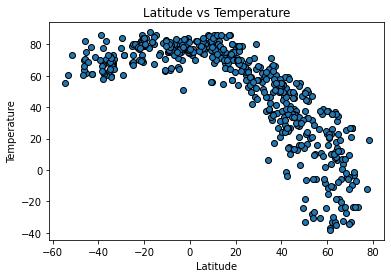

In [31]:
plt.scatter(lat, temp, marker='o', edgecolors="black")
plt.title("Latitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()
print("")

## Latitude vs. Humidity Plot

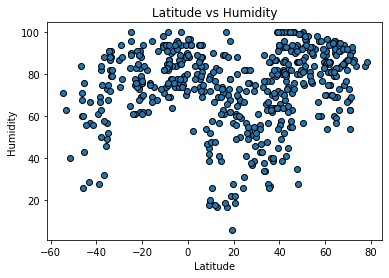

In [32]:
plt.scatter(lat, humid, marker = 'o', edgecolors="black")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

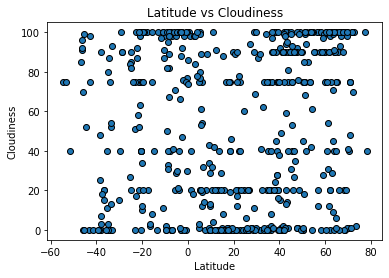

In [34]:
plt.scatter(lat, cloud, marker='o', edgecolors="black")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

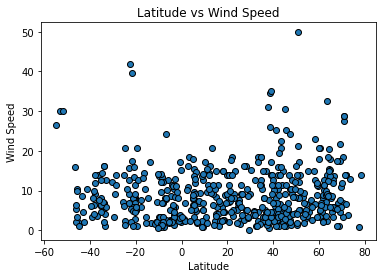

In [35]:
plt.scatter(lat, wind_sp, marker='o', edgecolors="black")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

In [53]:
#if lat >0 northern, <0 southern
#creating new dfs to create graphs
north_hemi = trip_df.loc[trip_df['Lat'] >= 0]
south_hemi = trip_df.loc[trip_df['Lat'] < 0]
north_hemi.head()
south_hemi.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,1612307380,42.6001,-73.9662,26.01,87,100,1.01
2,Saskylakh,RU,1612307641,71.9167,114.0833,-3.23,91,100,13.98
4,Hilo,US,1612307485,19.7297,-155.0900,78.80,57,90,13.80
6,Sharjah city,AE,1612307376,25.3573,55.4033,64.00,82,6,2.30
7,Kapaa,US,1612307486,22.0752,-159.3190,78.80,69,20,18.41


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression